<center>
<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/AB.jpeg?raw=true" height="200"> 

# Андан на экономе: домашнее задание 4 
## Проверка гипотез и А/Б-тестирование
</center>


**ФИО: Берлизова Дарья Евгеньевна**

**id из контеста: dap_econ_2022_41**

## Общая информация


__Дата выдачи:__ 17.05.2023

__Мягкий дедлайн:__ 23:59MSK 09.06.2023

__Жесткий дедлайн:__ 23:59MSK 16.06.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-04-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from math import sqrt

In [2]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (8, 4)

# Часть 1: Процедура проверки гипотез

Для начала повторим теорию проверки гипотез и поотвечаем на различные вопросы. 

> Ниже вас ждут несколько примеров гипотез, на которые вам нужно получить статистически значимые ответы. Вы можете пользоваться встроенными функциями тестов, можете писать свои, а можете использовать с семинаров – это не влияет на полученные баллы. Вы также оставляете за собой право выбрать, проверять гипотезу через `p-value` или по критическим точкам или вообще по доверительным интервалам (но здесь будьте осторожнее, особенно, когда у вас 2 выборки). 

__Здесь важно:__

- Правильно посчитать `p-value` либо наблюдаемое значение критерия (либо дов. интервал);
- Правильно сделать вывод об отвержении / не отвержении нулевой гипотезы;
- Правильно выбрать тест для проверки и обосновать, почему вы выбрали именно его.

Гипотезы проверяйте на $5\%$ уровне значимости

## Задача №1: Экзамен

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/exam.jpeg?raw=true" width="400" align='left'>

У вас есть набор данных об оценках студентов на экзамене. Каждая строка в датасете – отдельный студент. Датасет представляет собой следующие колонки:

* `gender` – пол
* `race/ethnicity` – раса / этническая принадлежность
* `parental level of education` – уровень образования
* `lunch` – получает ли бесплатные обеды (тип питания)
* `test preparation course` – прошел ли курсы по подготовке к тесту
* `math score` – баллы за математику
* `reading score` – баллы за чтение
* `writing score` – баллы за письменность

In [4]:
df = pd.read_csv('students_exam.csv')

In [5]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


__а)__ __[5 баллов]__  Проверьте гипотезу о том, что студенты, получившие высшее образование (associate's degree, bachelor's degree, master's degree) в среднем пишут математику на большее число баллов, чем студенты со средним образованием (high school, some high school, some college). 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high} = \mu_{middle} \\
& H_1: \mu_{high} > \mu_{middle}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: студенты с высшим образованием и со средним. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

**Попробовала Z-test, итоговый критерий Манна-Уитни.**

In [6]:
high = ["associate's degree", "bachelor's degree", "master's degree"]
middle = ["high school", "some high school", "some college"]
math_high = df[df['parental level of education'].isin(high)]['math score']
math_middle = df[df['parental level of education'].isin(middle)]['math score']

In [7]:
alpha = 0.05

diff = math_high.mean() - math_middle.mean()
diff_std = np.sqrt(math_high.var(ddof=1)/math_high.size + math_middle.var(ddof=1)/math_middle.size)
z_obs = diff/diff_std
z_obs

4.309042859193757

In [8]:
z_crit = sts.norm.ppf(1 - alpha/2)
pval = 2*sts.norm.cdf(-z_obs)
z_crit, pval

(1.959963984540054, 1.639625946497308e-05)

Можно заметить, что у распределения длинные хвосты, p-value неправдоподобно мало. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае использовать другой критерий, а именно критерий Манна-Уитни.

In [9]:
U, pval = sts.mannwhitneyu(math_high, math_middle, alternative='greater')
U

136869.0

In [10]:
pval

7.383101598673211e-05

In [11]:
if pval > alpha:
    print('H0 не отвергается')
else:
    print('H0 отвергается')

H0 отвергается


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Критерий Манна-Уитни применяется для сравнения выборочных средних для распределений, отличных от нормального, значения которых могут быть ранжированы. Его предпосылки: в каждый из выборок наблюдения независимо одинаково распределенные (студенты независимы между собой) и значения случайных величин могут быть ранжированы (что очевидно для оценок за экзамен), значения в двух выборках похоже распределены, но сдвинуты относительно друг от друга. Нормальность данных можно проверить с помощью соответствующих тестов (есть функция normaltest, использующая тест Пирсона). Гипотеза о нормальности данных отвергается на всех  уровнях значимости, поэтому мы применяем не двухвыборочный t-тест.

In [12]:
sts.normaltest(df[df['parental level of education'].isin(high)]['math score'])

NormaltestResult(statistic=14.130812617486912, pvalue=0.0008541478021277517)

In [13]:
sts.normaltest(df[df['parental level of education'].isin(middle)]['math score'])

NormaltestResult(statistic=26.575138553042123, pvalue=1.6954382829898387e-06)

__б)__ __[5 баллов]__  Правда ли что в среднем студенты пишут экзамен по `reading` так же, как и по `math`? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{math} = \mu_{reading} \\
& H_1: \mu_{math} \neq \mu_{reading}
\end{aligned}
$$

__Подсказка:__ В тесте 2 выборки: баллы по чтению и баллы по математике. Подумайте о том, как эти выборки связаны между собой. Также обратите внимание на альтернативную гипотезу!

**Использую t-тест для парных выборок.**

In [14]:
Z, pval_1 = sts.ttest_rel(df['math score'], df['reading score'])
Z

-10.816230631665421

In [15]:
pval_1

7.322335900414138e-26

In [16]:
if pval_1 > alpha/2:
    print('H0 не отвергается')
else:
    print('H0 отвергается')

H0 отвергается


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Этот критерий чаще всего применяется для парных нормальных выборок. Предпосылки: все разности баллов для каждого студента независимы между собой и нормально распределены, студенты независимы между собой. Гипотеза о нормальности не отвергается на уровне значимости 1%. 

In [17]:
sts.normaltest(df['math score']- df['reading score'])

NormaltestResult(statistic=8.742303349488008, pvalue=0.012636678840559183)

## Задача №2:  О мышах и людях

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/vagon.jpeg?raw=true" width="400" align='left'>

Для изучения аспектов процесса принятия моральных решений психологи уже много лет используют этические дилеммы, с помощью которых оценивают действия людей в гипотетических ситуациях. Один из самых известных примеров — это [проблема вагонетки,](https://ru.wikipedia.org/wiki/Проблема_вагонетки) в которой необходимо принять решение о том, стоит ли пожертвовать одним человеком для спасения пятерых.

Бельгийские психологи воплотили дилемму в реальную жизнь. Участники эксперимента должны были выбрать, ударить током пять мышей или одну мышь. Эксперимент проходил следующим образом. Участника сажали перед двумя клетками, в одной из которых сидели пять мышей, а в другой — одна. Перед клетками стоял ноутбук с $20$-секундным таймером: участникам сообщили, что по истечении этих $20$ секунд в клетку с пятью мышами пустят ток, и мыши получат не смертельный, но очень болезненный удар. Пока время идет, участник может нажать на кнопку: в этом случае ток пустят по клетке с одной мышью. В исследовании использовали живых мышей. 

Удары тока были ненастоящими: сразу же после «удара» участников сопроводили в отдельную комнату, где разъяснили им, что мыши в полном порядке и током их не били (об этом заранее догадались только $12$ участников). В решении реальной проблемы вагонетки приняли участие $192$ человека, а еще $83$ решали такую же задачку, но гипотетическую (на бумаге). Все участники также прошли онлайн-опросы, в ходе которых учёные собрали о респондентах кучу дополнительной информации. 

В файле `mouse.csv` лежит информация о том, как прошёл эксперимент. Нас будут интересовать столбцы: 

* __STUDY:__ какую проблему вагонетки решал человек $1$, если на бумаге и $2$, если реальную
* __AGE:__ возраст респондента 
* __GENDER:__ пол респондента
* __DECISION:__ решение дилеммы ($1$ - жать на кнопу, $0$ - не жать) 
* __RT:__ время, которое респондент потратил, чтобы нажать на кнопку 

Подробное описание данных, сами данные и даже код на R, использованный при оценивании моделей, можно найти в [репозитории исследования.](https://osf.io/kvb99/) В статье авторы строили несколько логистических регрессий, чтобы очистить эффект от психологических особенностей респондентов. Про подобные приёмы очистки мы немного поговорим позже.  Также более подробно про исследование [можно почитать на N + 1.](https://nplus1.ru/news/2018/05/11/mice-trolley)

In [18]:
df = pd.read_csv('mouse.csv', sep='\t')
df = df[['STUDY', 'AGE', 'GENDER', 'DECISION', 'RT']]
df = df[~df.DECISION.isnull()]
df.head()

,STUDY,AGE,GENDER,DECISION,RT
3,1,21,0,1.0,9.212427
4,1,20,0,1.0,17.071711
5,1,21,1,1.0,9.827884
6,1,23,1,1.0,10.143030
7,1,20,1,1.0,7.447534


__а)__ __[5 баллов]__ Попытаемся ответить на тот же вопрос, что и исследователи. В какой из двух ситуаций респонденты чаще принимают решение нажать кнопку: в реальной или на бумаге?

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_1 = p_2 \hspace{2mm} \text{(На бумаге и в реальности жмут на кнопку одинаково часто)} \\
&H_1: \hspace{2mm} p_1 > p_2  \hspace{2mm} \text{(На бумаге на кнопку жмут чаще)}
\end{aligned}
$$

**Использую биномиальный тест на разность долей.**

In [19]:
from statsmodels.stats.proportion import test_proportions_2indep
p1 = df[df['STUDY'] == 1]['DECISION'].mean()
n1 = df[df['STUDY'] == 1]['DECISION'].count()
p2 = df[df['STUDY'] == 2]['DECISION'].mean()
n2 = df[df['STUDY'] == 2]['DECISION'].count()
test_proportions_2indep(p1, n1, p2, n2, alternative='larger')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = -0.6471065995908296
pvalue = 0.7412185228401718
compare = 'diff'
method = 'agresti-caffo'
diff = -0.004496816646606506
ratio = 0.5003456471214158
odds_ratio = 0.49808550698904225
variance = 0.00028589440387091503
alternative = 'larger'
value = 0
tuple = (-0.6471065995908296, 0.7412185228401718)

p-value больше 5%, нулевая гипотеза не отвергается.

__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Это наиболее распространённый критерий для сравнения пропорций. Он предполагает, что элементы двух выборок получены из биномиального распределения с независимыми и идентичными (внутри выборки). Поскольку исход бинарный, то можно считать, что распределение биномиальное. Решения людей можно считать независимыми. 

__б)__ __[5 баллов]__  Кровожадные люди быстро берут на себя ответственность за удар мышки током. Будем считать, что кровожадные люди принимают решение менее, чем за пять секунд. Правда ли, что люди по своей природе кровожадные? 

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 5 \hspace{2mm} \text{(Люди кровожадны)} \\
&H_1: \hspace{2mm} \mu > 5  \hspace{2mm} \text{(Люди не кровожадны)}
\end{aligned}
$$

In [20]:
U1, pval_2 = sts.ttest_1samp(df['RT'].dropna(), popmean=5, alternative='greater')
U1

12.974895950977869

In [21]:
pval_2

2.7586881778173365e-27

In [22]:
if pval_2 > alpha:
    print('H0 не отвергается')
else:
    print('H0 отвергается')

H0 отвергается


__Почему вы выбрали для проверки гипотезы именно тот критерий, что вы выбрали? Какие у него предпосылки? Все ли они выполняются с данными?__

__Ответ:__ Это наиболее распространённый критерий для тестирования гипотез о среднем генеральной совокупности. В его предпосылки входят независимость и одинаковая распределённость данных. Решения отдельных участников эксперимента можно считать независимыми, результаты можно считать одинаково распределенными.

## Задача №3:  Парадокс

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/simpson.jpg?raw=true" width="350" align='left'>

Помимо решения задач и применения различных функций из библиотек необходимо очень аккуратно работать с данным и понимать, какие действия корректны, а какие нет. Перед вами результаты медицинских исследований: 

- из $1650$ мужчин, принимавших лекарство, выздоровели $770$, 
- из $223$ мужчин, не принимавших лекарство, выздоровели $88$,
- из $245$ женщин, принимавших лекарство, выздоровели $165$,
- из $750$ женщин, не принимавших лекарство женщин, выздоровели $440$.

Необходимо найти ответы на следующие вопросы: 

1. Влияет ли лекарство на мужчин?
2. Влияет ли лекарство на женщин? 
3. Влияет ли лекарство на людей обоих полов в целом?

Будем считать, что исследование проводилось методом двойного слепого тестирования. Врач не знал, даёт ли он пациенту плацебо или лекарство, пациент не знал, пьёт ли он плацебо или лекарство. 

Запишем данные в табличку. Пусть $A$ — принимавшие лекарство, $\overline{A}$ — не принимавшие лекарство, $B$ — выздоровевшие, $\overline{B}$ — не выздоровевшие.

<!--<img width="60%" src="pics/pic2.png">-->
<table>
<tr><td>
    
|Мужчины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 770 | 880 |
|$\overline{A}$| 88 | 135 |

</td><td>
    
|Женщины| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 165 | 80 |
|$\overline{A}$| 440 | 310 |

</td><td>

|Вместе| $B$ |  $\overline{B}$|
|--|--|--|
|$A$| 935 | 960 |
|$\overline{A}$| 528 | 445 |

</td></tr> </table>

Для решения задачи воспользуйтесь критерием хи-квадрат Пирсона. Мы его не разбирали на семинарах, однако на курсе матстата он у вас был. Вспомнить как он работает можно [в этом видео.](https://www.youtube.com/watch?v=bws1CB9XZ6E&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=10) Посмотреть на код можно [в этом видео.](https://www.youtube.com/watch?v=H3NtBN_o-hk&list=PLCf-cQCe1FRyCcf47wwBlDObNcz4ud2_L&index=12) Тетрадку с кодом можно [найти тут.](https://github.com/FUlyankin/matstat-AB/blob/main/week10_nonparam_bootstrap/04_05_python_kolmogorov_pearson.ipynb)

Тест поможет нам понять, есть ли у лекарства какой-то эффект. Применить тест в python помогает функция `chi2_contingency` из пакета `scipy.stats`. Используйте её с параметром `correction=False`.

__а)__ __[5 баллов]__ Давайте попробуем найти ответ на вопрос, есть ли эффект от лекарства для мужчин? 

**Нулевая гипотеза - прием лекарства не влияет на выздоровление мужчин, уровень значимости 5%.**

Давайте предварительно посчитаем долю выздровевших мужчин, которые принимали лекарство и долю выздровевших мужчин, которые не принимали лекартсво. Сравните эти доли.

In [23]:
healthy_pill_men = 770/(770+85)
healthy_nopill_men = 85/(770+85)
healthy_pill_men, healthy_nopill_men

(0.9005847953216374, 0.09941520467836257)

In [24]:
healthy_pill_men / healthy_nopill_men

9.058823529411764

Доля выздоровевших мужчин, принимавших лекарство, в 9 раз выше чем доля выздоровевших мужчин, которые не принимали лекарство.

Создадим матрицу размера $2 \times 2.$ Внесём в неё частоты, полученные для мужчин.

In [25]:
men = np.array([[770,880],[88,135]])

Примените тест с параметром `correction=False` и сделайте выводы на уровне значимости $5\%.$

In [26]:
sts.chi2_contingency(men, correction=False)

(4.107854906463222,
 0.04268446899604581,
 1,
 array([[755.84623599, 894.15376401],
        [102.15376401, 120.84623599]]))

Поскольку p-value меньше 5%, нулевая гипотеза отвергается на 5%-ном уровне значимости. Эффект от лекарства для мужчин есть.

__б)__ __[10 баллов]__ Сделайте всё то же самое, но руками, без помощи библиотеки.

Для того, чтобы расчитать тестовую стаститику хи-квадрат, нам необходимо найти матрицу ожидаемых частот, такую же, которая у нас получилась в предыдущем пункте в output-е функции `chi2_contingency`. 

Используя матрицу из предыдущего пункта, посчитайте общее количество испытуемых мужчин.

In [27]:
men_all = men.sum()
men_all

1873

Посчитайте отдельно количество испытуемых мужчин, которые принимали лекарство, и которые не принимали его $(n1, n2)$

In [28]:
n1 = men[0].sum()
n2 = men[1].sum()

In [29]:
n1

1650

In [30]:
n2

223

In [31]:
men_t = men.T

Найдите вероятности выздороветь или нет (независимо от группы по приему/не приему лекарства), то есть вероятность попасть в $B$ и $\overline{B}$ для мужчин.

In [32]:
p_healthy = men_t[0].sum() / men_all
p_nothealthy = men_t[1].sum() / men_all
p_healthy, p_nothealthy

(0.4580886278697277, 0.5419113721302723)

Расчитайте ожидаемые (теоритические) значения для каждой ячейки матрицы. Для этого перемножьте вероятности из предыдущего пункта со значениями $n_1$ и $n_2$. Полученную матрицу можно сравнить с выводом библиотеки`scipy.stats`, она должна быть идентичной.

In [33]:
E = np.array([[p_healthy*n1, p_nothealthy*n1],[p_healthy*n2, p_nothealthy*n2]])
E

array([[755.84623599, 894.15376401],
       [102.15376401, 120.84623599]])

Расчитайте наблюдаемую статистику и найдите `p_value` с помощью `sts.chi2.cdf` с параметром `df=1`.

\begin{equation*} \chi^2_d = \sum {\frac {(O-E)^2}{E}},\end{equation*}

где

- $E$ - наши ожидаемые частоты(матрица из предыдущего пукта),
- $O$ - наблюдаемы частоты(первоначальная матрица).

In [34]:
chi2 = ((men - E)**2 / E).sum()
p = 1-sts.chi2.cdf(chi2, df=1)
p

0.04268446899604583

__в)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для женщин? (повторите процедуру пункта а) 

Как и в предыдущий раз, для начала, посчитайте долю выздровевших женщин, которые принимали лекарство и долю выздровевших женщин, которые не принимали лекартсво. Сравните эти доли.

**Нулевая гипотеза - прием лекарства не влияет на выздоровление женщин, уровень значимости 5%.**

In [35]:
healthy_pill_women = 165/(165+440)
healthy_nopill_women = 440/(165+440)
healthy_pill_women, healthy_nopill_women

(0.2727272727272727, 0.7272727272727273)

In [36]:
healthy_nopill_women / healthy_pill_women

2.666666666666667

Доля выздоровевших женщин, не принимавших лекарства, почти в 3 раза выше.

Создайте матрицу с данными из таблицы по женщинам, примените тест с параметром `correction=False` и сделайте выводы на уровене значимости $5\%$.

In [37]:
women = np.array([[165,80],[440,310]])
sts.chi2_contingency(women, correction=False)

(5.838444095586957,
 0.015679686056826774,
 1,
 array([[148.96984925,  96.03015075],
        [456.03015075, 293.96984925]]))

Поскольку p-value меньше 5%, нулевая гипотеза отвергается на 5%-ном уровне значимости. Эффект от лекарства для женщин есть.

__г)__ __[5 баллов]__  Ответьте на вопрос: есть ли эффект от лекарства для объединенной группы?

In [38]:
people = np.array([[935,960],[528,445]])
sts.chi2_contingency(people, correction=False)

(6.239588767305169,
 0.012492547994073244,
 1,
 array([[966.66143654, 928.33856346],
        [496.33856346, 476.66143654]]))

Поскольку p-value меньше 5%, нулевая гипотеза отвергается. Эффект для объединённой группы есть.

Соотносится ли это с результатами по группам мужчин и женщин, взятых отдельно?

Да, результаты по отвержению нулевой гипотезы совпали.

## Что произошло?

Если вы все сделали правильно, скорее всего у вас получились противоречивые значимые результаты. Давайте разберемся почему это так.

Может произойти такая ситуация, что новое лекарство может оказаться эффективным в каждом из отдельных исследований, на каждой отдельной группе, но объединение результатов укажет на то, что это лекарство либо бесполезно, либо вредно. [Это называется __парадокс Симпсона.__](https://ru.wikipedia.org/wiki/Парадокс_Симпсона) Он довольно часто встречается на практике в разном виде. 

Проблема здесь в том, что объединять эти выборки просто слив данные вместе — нельзя. Контрольные группы людей, не принимавших лекарство, занимают разный объем от выборок — примерно 12% в случае мужчин и 75% в случае женщин.

# Часть 2: А/Б-тестирование

## Задача №4: Не подглядывать!

<img src="https://github.com/hse-econ-data-science/andan_2023/blob/main/hw/hw04/images/trump.png?raw=true" width="500" align='left'>

На американских выборах 2020 года в некоторых штатах проходила очень конкурентная борьба между кандидатами. По мере подсчета голосов перевес в голосах склонялся то в пользу демократов, то в пользу республиканцев. И вот, в один из таких моментов, когда чаша весов склонилась в пользу республиканцев, Д. Трамп написал в твиттер "stop the count!", что означало призыв к остановке подсчета голосов. 

_Здесь у вас мог возникнуть вопрос, и зачем нам это?_ 

Ответ очень прост. В этой ситуации всем очевидно, что призыв Трампа не мог быть осуществлен, то есть прерывать подсчет голосов раньше времени кажется довольно глупым способом выявления победителя. И вот абсолютно такой же способ принятия решения есть и в А/Б-тестах, только теперь многим аналитикам он уже кажется не столь очевидным, что приводит к существенным ошибкам в заключении выводов. 

_Решив эту задачу, мы познакомимся с такой проблемой подробнее и поймем, как не стоит делать, когда вы запускаете А/Б-тест._

Чтобы понять, в чем же именно заключается проблема, мы с вами будем проводить симуляции А/Б-тестов. Это когда мы генерируем данные уже со знаниями, как эти данные устроены. А затем, запуская процедуру проверки гипотез над такими симулированными данными, мы будем оценивать, что происходит на практике (при запуске А/Б-теста).

На практике же всегда неизвестно, как устроены данные, и проводя А/Б-тест мы пытаемся зафиксировать различия. Еще раз, здесь же мы будем знать об устройстве данных, а затем будем смотреть на поведение А/Б-теста, то есть как будто бы смотреть на тест с обратной стороны. 

_Перед тем как идти дальше, остановитесь здесь и еще раз зафиксируйте это!_

__а) [10 баллов]  Подсчет размера выборки для А/Б-теста__

Предположим, что вы хотите провести А/Б-тест внутри вашего приложения. Вы выбрали некоторую метрику $X$ – случайную величину из нормального распределения с мат. ожиданием $100$ у.е. и стандартным отклонением $40$ у.е – это ваш бейзлайн (группа А). Рассчитайте, сколько дней вам нужно крутить такой А/Б-тест, если:

1. Вы ожидаете получить минимальный размер эффекта в $5$ у.е.;
2. Вы хотите зафиксировать ошибку первого рода на уровне $\alpha=5\%$, а ошибку второго рода на уровне $\beta=20\%$;
3. Вы точно знаете, что в группе Б стандартное отклонение метрики составляет $20$ у.е.
4. Посещаемость вашего приложения ежедневно составляет $200$ пользователей, и вы готовы раскатить тест на $100\%$ трафика.

Формула для расчета числа наблюдений _для одной группы_:

$$
n_{\text{one group}} = \frac{(\sigma_A^2 + \sigma_B^2) \cdot (z_{1-\frac{\alpha}{2}} + z_{1-\beta})^2}{MDE^2},
$$

__Подсказка:__ Помните, что после получения общего числа наблюдений вам нужно выразить это в дни! Вы должны получить целое число. Также будьте аккуратны с подсчетом трафика и кол-ва наблюдений – обратите внимание, со скольким числом групп вы работаете!

In [39]:
n_one_group = (40**2 + 20**2)* (sts.norm.ppf(1-0.05/2)+sts.norm.ppf(1-0.2))**2 / 5**2
n_all = 2 * n_one_group
n_days = n_all // 200 + 1
n_days

7.0

__б) [25 баллов] Симуляция А/Б-теста__

Теперь нам нужно запустить А/Б-тест. Для этого:

1. Сгенерируйте выборку данных из нормального распределения для группы А и Б в конкретный один день. Считайте, что в группе Б математическое ожидание составляет $105$ у.е., то есть с учетом размера вашего минимального ожидаемого эффекта из предыдущего пункта.

In [40]:
#np.random.seed(seed = 42)

In [52]:
A = sts.norm.rvs(size = 100, loc = 100, scale = 40, random_state=42)
B = sts.norm.rvs(size = 100, loc = 105, scale = 20, random_state=42)

2. Теперь представим, что наш тест был запущен $X$ дней. Напишите функцию, которая за этот период теста собирает в `DataFrame` следующие данные на каждый день теста: 
    1. среднее метрики в группе А
    2. среднее метрики в группе Б
    3. p-value, посчитанное с помощью t-test – можно воспользоваться встроенной функцией `scipy.stats.ttest_ind`
    
    Соберите `DataFrame` для $X=50$.
    
__Подсказка:__ Среднее для 1-го дня должно считаться по пользователям, пришедших в первый день, для второго дня – по пользователям, пришедшим в первый и второй день и т.д. То есть накопленным итогом за каждый день теста.

In [60]:
def AB_test(num, MDE=5):
    A = np.array([])
    B = np.array([])
    A_mean = []
    B_mean = []
    p_value = []
    for i in range(num):
        A = np.append(A, sts.norm.rvs(size = 100, loc = 100, scale = 40))
        B = np.append(B, sts.norm.rvs(size = 100, loc = 100 + MDE, scale = 20))
        A_mean.append(A.mean())
        B_mean.append(B.mean())
        p_value.append(sts.ttest_ind(A,B)[1])
    return pd.DataFrame({'День':range(1,num + 1),'A среднее':A_mean, 'B среднее':B_mean, 'p-value':p_value})
        

In [61]:
df = AB_test(50)
df.head()

,День,A среднее,B среднее,p-value
0,1,105.656238,99.614245,0.169844
1,2,100.595401,102.088342,0.640350
2,3,98.747544,103.336307,0.080209
3,4,99.683948,104.861473,0.021521
4,5,99.121319,105.088651,0.002966


3. На основе `DataFrame` из предыдущего пункта постройте график динамики среднего в группе А и в группе Б по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится.

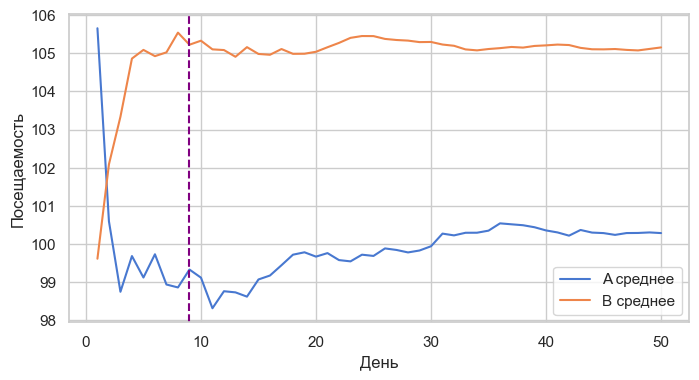

In [62]:
sns.lineplot(x='День', y='A среднее', data=df)
sns.lineplot(x='День', y='B среднее', data=df)
plt.legend(labels=["A среднее","B среднее"])
plt.ylabel('Посещаемость')
plt.axvline(9, ls='--', c='purple')

4. На основе `DataFrame` из предыдущего пункта постройте график динамики p-value по дням теста. Отложите вертикальную линию на этом же графике, показывающую кол-во дней, посчитанных в пункте 1. Сделайте эту линию пунктирной и измените цвет, который вам больше нравится. Также отложите горизонтальную линию – ваш уровень значимости $\alpha$.

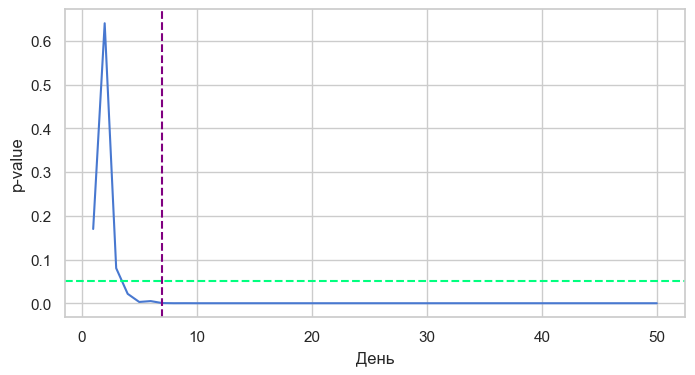

In [63]:
sns.lineplot(x='День', y='p-value', data=df)
plt.ylabel('p-value')
plt.xlabel('День')
plt.axvline(7, ls='--', c='purple')
plt.axhline(0.05, ls='--', c='springgreen')

5. Перегенируруйте шаги 2-4 несколько раз, посмотрев на графики. Что вы видите? Что происходит с p-value в периодах:
    1. до кол-ва дней, посчитанных по формуле из п.1
    2. в точке кол-ва дней, посчитанных по формуле из п.1
    3. после кол-ва дней, посчитанных по формуле из п.1
    
    Опишите выводы максимально подробно.

A. Ведёт себя хаотически, в некоторых случаях растёт, в некоторых случаях убывает, нулевая гипотеза то выполняется, то не выполняется, значения максимально колеблются.

B. В этой точке в большинстве случаев p-value убывает, начинает убывать, или уже активно стремится к 0.

C. p-value убывает, стремится к 0 во всех случаях, но разброс максимально разный.

6. Теперь предположим, что мы поменяли наш $MDE$ до $1$ у.е. То есть мат. ожидание в группе А осталось по-прежнему $100$, а вот в группе Б теперь $101$. Перегенерируйте пункты 2-4 для измененного $MDE$, при этом кол-во дней в п.1 не пересчитывайте. Что происходит с p-value? Сделайте выводы.

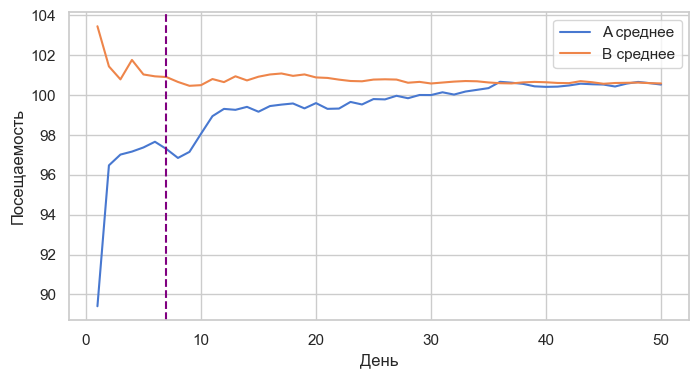

In [69]:
df1 = AB_test(50, MDE=1)
sns.lineplot(x='День', y='A среднее', data=df1)
sns.lineplot(x='День', y='B среднее', data=df1)
plt.legend(labels=["A среднее","B среднее"])
plt.ylabel('Посещаемость')
plt.axvline(7, ls='--', c='purple')

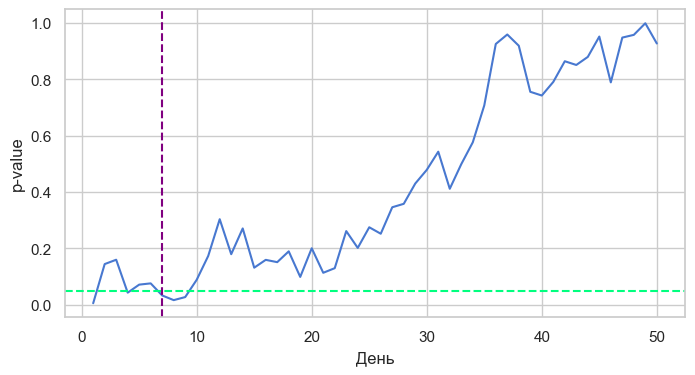

In [70]:
sns.lineplot(x='День', y='p-value', data=df1)
plt.ylabel('p-value')
plt.axvline(7, ls='--', c='purple')
plt.axhline(0.05, ls='--', c='springgreen')

p-value не сходится к 0 так же быстро, как в предыдщуем случае, в большинстве случаев она даже растет, тренд противоположный. Очевидно, того количества дней, которого было достаточно для MDE=5, недостаточно для MDE=1.

__с) [20баллов] Симуляция А/А-теста__

Теперь представим, что изменений на самом деле никаких нету, то есть мат. ожидание в обоих группах $100$, а $MDE = 0$

1. И снова перегенерируйте вышесделанные пункты 2-4. Что происходит с p-value? Может ли оно оказаться ниже уровня значимости? 

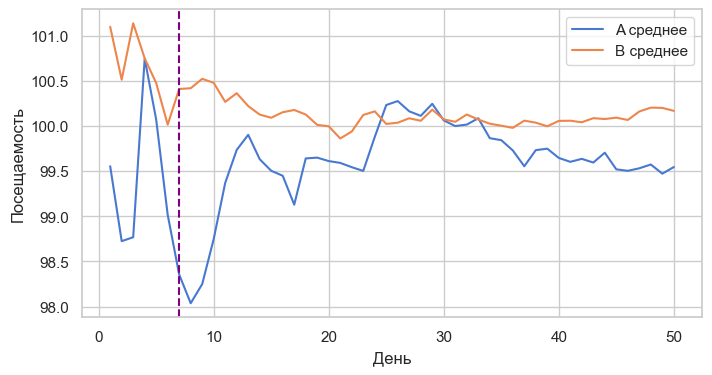

In [79]:
df2 = AB_test(50, MDE=0)
sns.lineplot(x='День', y='A среднее', data=df2)
sns.lineplot(x='День', y='B среднее', data=df2)
plt.legend(labels=["A среднее","B среднее"])
plt.ylabel('Посещаемость')
plt.axvline(7, ls='--', c='purple')

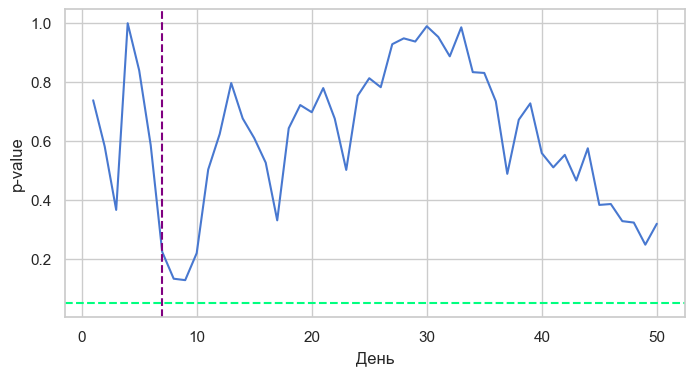

In [80]:
sns.lineplot(x='День', y='p-value', data=df2)
plt.ylabel('p-value')
plt.axvline(7, ls='--', c='purple')
plt.axhline(0.05, ls='--', c='springgreen')

После некоторых колебаний в начале, p-value при большинстве попыткок после 7 дня стабильно выше уровня значимости. Колебания есть только в течение нескольких первых дней.

2. Ну и напоследок, напишите функцию, которая генерирует p-value на последний день A/A теста. А затем запустите эту функцию $1000$ раз, собрав $1000$ значений p-value. Постройте гистограмму их распределения. Что вы видите? 

__Подсказка:__ Для такой функции достаточно создать выборку один раз, изменив ее размер.

In [50]:
P_value_AA = []
for i in range(1000):
    A = sts.norm.rvs(size=50, loc=100, scale = 40)
    B = sts.norm.rvs(size=50, loc=100, scale = 20)
    P_value_AA.append(sts.ttest_ind(A, B)[1])

Text(0, 0.5, 'Количество')

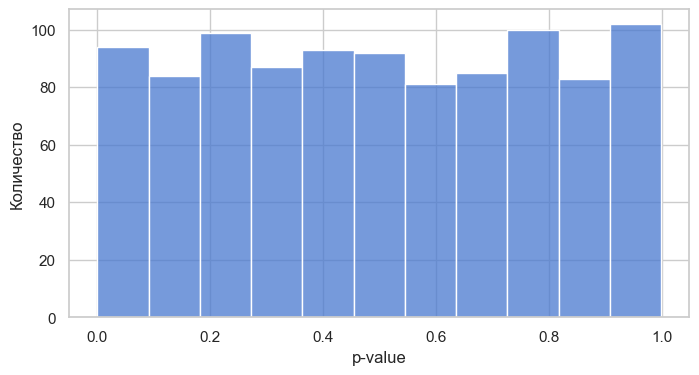

In [51]:
sns.histplot(P_value_AA)
plt.xlabel('p-value')
plt.ylabel('Количество')

Мы видим, что p-value имеет приближенно равномерное распределение от 0 до 1